<a href="https://colab.research.google.com/github/BrunoCavagnaro/DiplomadoDSML/blob/master/Trabajo_Examen_1_DSML_Agrar%C3%ADa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO 1 - Bruno Cavagnaro

En esta ocación se va a presentar el trabajo correspondiente al dataset de 'Data_cov'. En este dataset tenemos información sobre distintas empresas, y se crear un modelo capaz de predecir si una empresa va a ser impactada por la crísis. En este trabajo se va a realizar el preprocesamiento de los datos, incluyendo tratamiento de missing, detección de outliers, tratamiento de variables y selección de variables; además se crearán múltiples modelos, donde se seleccionara el que tenga mejor Gini y Accuracy. 

## Dependencias:

In [1]:
!pip install feature-engine

In [2]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import os
from graphviz import Source
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import roc_auc_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_circles, make_blobs
from sklearn.svm import SVR
from sklearn import datasets
from ipywidgets import interact, fixed
import scipy as sp
from sklearn import preprocessing
from scipy.spatial.distance import mahalanobis
from sklearn.preprocessing import MinMaxScaler
from feature_engine import discretisers as dsc
from feature_engine import variable_transformers as vt
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
%cd '/content/gdrive/My Drive/Colab Notebooks/Diplomados_MLDS_Agraria/'

/content/gdrive/My Drive/Colab Notebooks/Diplomados_MLDS_Agraria


In [5]:
data = pd.read_csv('Data_cov.csv', delimiter = ';', encoding='latin_1')

In [6]:
data.head()

,Sector,Dep,Impactado,Saldo,Desembolso_mes,Saldo Promedio,"Deuda Sistea,",Pasivo,Turismo,Sector de Impacto,Venta,Venta Formal,Pasivo_desembolso,Deuda rezagada va,Deuda rezagada vr,pasivo rezagada va,pasivo rezagada vr,Pasivo_desembolso da,Pasivo_desembolso dr
0,INDUSTRIA,Lima,0,56643.10092,0.0,28321.55046,31365.73,5876.82,0,3,108400.0,43741.08,5876.82,-800.65,-0.024891,830.82,0.164649,830.82,0.164649
1,COMERCIO,Arequipa,0,190313.99460,0.0,63437.99818,64864.99,4467.40,0,4,105300.0,69737.17,4467.40,-2810.52,-0.041529,-7043.43,-0.611896,-7043.43,-0.611896
2,SERVICIO,Amazonas,0,547601.57360,0.0,182533.85790,200239.32,5000.92,0,1,86600.0,79178.83,5000.92,653.68,0.003275,2000.92,0.666973,2000.92,0.666973
3,INDUSTRIA,Lima,0,283914.20840,0.0,94638.06947,112945.17,325.50,0,3,103000.0,0.00,325.50,14820.77,0.151041,-17128.30,-0.981351,-17128.30,-0.981351
4,COMERCIO,Cusco,0,142296.43840,0.0,47432.14612,144877.21,0.00,0,4,172920.0,171999.33,0.00,17468.60,0.137107,-2071.80,-1.000000,-2071.80,-1.000000


## Preprocesamiento

In [7]:
print(data.isnull().sum()) 
#Dataset no cuenta con NULL VALUES:
#DATASET CON 
print(data.info())

Sector                  0
Dep                     0
Impactado               0
Saldo                   0
Desembolso_mes          0
Saldo Promedio          0
Deuda Sistea,           0
Pasivo                  0
Turismo                 0
Sector de Impacto       0
Venta                   0
Venta Formal            0
Pasivo_desembolso       0
Deuda rezagada va       0
Deuda rezagada vr       0
pasivo rezagada va      0
pasivo rezagada vr      0
Pasivo_desembolso da    0
Pasivo_desembolso dr    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sector                1998 non-null   object 
 1   Dep                   1998 non-null   object 
 2   Impactado             1998 non-null   int64  
 3   Saldo                 1998 non-null   float64
 4   Desembolso_mes        1998 non-null   float64
 5   Saldo Promedio        19

### Revisión de Features:

Antes de evaluar los outliers, he decidido hacer una revisión a los features, ver que significan los features no numéricos:

In [8]:
print(data.groupby('Sector')['Sector'].count()) 
#SECTOR ECONOMICO AL QUE PERTENECE LA EMPRESA
print(data.groupby('Dep')['Dep'].count())
#DEPARTAMENTO DONDE ESTA UBICADO LA EMPRESA - POSIBLEMENTE SE DEBERÁ AGRUPAR EN REGIONES COSTA, SIERRA, SELVA
print(data.groupby('Impactado')['Impactado'].count())
#SI LA EMPRESA FUE IMPACTADA POR LA CRISIS (FEATURE A PREDECIR)
print(data.groupby('Desembolso_mes')['Desembolso_mes'].count())
#NUEVA DEUDA DEL MES - TIENE MUY POCA DISTRIBUCIÓN DE DATOS (SOLO 4 PUNTOS DISTINTOS A 0), POR TANTO NO ES UN FEATURE QUE
#AGREGUE VALOR, POR TANTO SE BORRARA:
data = data.drop('Desembolso_mes', axis = 1)
print(data.groupby('Turismo')['Turismo'].count())
#SI LA EMPRESA PERTENECE O NO AL TURISMO
print(data.groupby('Sector de Impacto')['Sector de Impacto'].count())
#ACTIVIDADES ECONÓMICAS MÁS IMPACTADAS POR LAS EMPRESAS

Sector
COMERCIO     1140
INDUSTRIA     256
SERVICIO      602
Name: Sector, dtype: int64
Dep
Amazonas          23
Apurímac          15
Arequipa         189
Ayacucho          27
Cajamarca         55
Callao            35
Cusco             48
Huancavelica       2
Huánuco           53
Ica               52
Junín            118
La Libertad      104
Lambayeque        98
Lima             725
Loreto            22
Madre de Dios     14
Moquegua          18
Pasco             28
Piura             87
Puno              26
San Martín        88
Tacna             36
Tumbes            27
Ucayali           34
Áncash            74
Name: Dep, dtype: int64
Impactado
0    999
1    999
Name: Impactado, dtype: int64
Desembolso_mes
0.0000         1994
128751.8279       1
148278.4607       1
149450.6020       1
169166.8642       1
Name: Desembolso_mes, dtype: int64
Turismo
0    1888
1     110
Name: Turismo, dtype: int64
Sector de Impacto
1    240
2    106
3    967
4    685
Name: Sector de Impacto, dtype: int64


### Revisión Features Continuos:

['Saldo',
 'Saldo Promedio',
 'Deuda Sistea,',
 'Pasivo',
 'Venta ',
 'Venta Formal',
 'Pasivo_desembolso',
 'Deuda rezagada va',
 'Deuda rezagada vr',
 'pasivo rezagada va',
 'pasivo rezagada vr',
 'Pasivo_desembolso da',
 'Pasivo_desembolso dr']

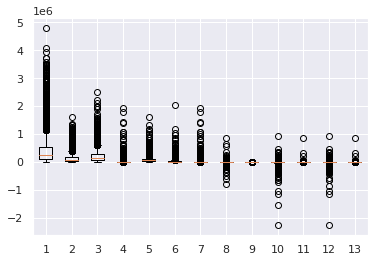

In [9]:
#PRIMERO SE VERÁN LA DISTRIBUUCIÓN DE LOS VALORES:

plt.boxplot([data["Saldo"], data["Saldo Promedio"], data["Deuda Sistea,"], data["Pasivo"], data["Venta "], 
             data["Venta Formal"], data["Pasivo_desembolso"], data["Deuda rezagada va"], data["Deuda rezagada vr"],
             data["pasivo rezagada va"], data["pasivo rezagada vr"], data["Pasivo_desembolso da"], data["Pasivo_desembolso dr"]])
plt.plot()

#SE PUEDE VER QUE HAY UNA GRAN CANTIDAD DE OUTLIERS EN LA DATA, SIN EMBARGO TAMBIÉN PUEDE VERSE QUE LA MAYORÍA DE BOX 
["Saldo", "Saldo Promedio", "Deuda Sistea,", "Pasivo", "Venta ", "Venta Formal", "Pasivo_desembolso","Deuda rezagada va", 
"Deuda rezagada vr", "pasivo rezagada va", "pasivo rezagada vr", "Pasivo_desembolso da", "Pasivo_desembolso dr"]#PLOTS SE ENCUENTRAN MUY PRÓXIMOS, INDICANDO QUE UNA BUENA ESTRETEGIA SERÍA APLICAR UNA CATEGORIZACIÓN DEL MISMO NUMÉRO
#DE CATEGORIAS A ESTOS FEATURES

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


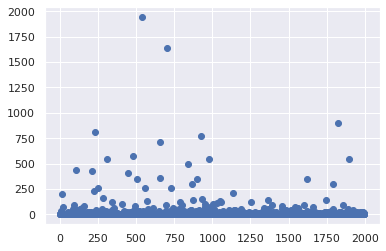

In [10]:
#DADO QUE EL DATASET ES SOBRE INFORMACIÓN FINANCIERA DE EMPRESAS, SE HA DECIDIDO HACER UNA ELIMINACIÓN DE FEATURES MENOS
#ESTRICTA, POR TANTO SE DECIDIO INICIALMENTE UTILIZAR LA DISTANCIA DE MAHALANOBIS:

#Mahalanobis Distance
df_m = data[["Saldo", "Saldo Promedio", "Deuda Sistea,", "Pasivo", "Venta ", "Venta Formal", "Pasivo_desembolso","Deuda rezagada va", 
"Deuda rezagada vr", "pasivo rezagada va", "pasivo rezagada vr", "Pasivo_desembolso da", "Pasivo_desembolso dr"]]

#matriz de covarianzas
Sx = df_m.cov().values
#inversa de la matriz de covarianzas
Sx = sp.linalg.inv(Sx)

mean = df_m.mean().values

def mahalanobisR(X,meanCol,IC):
    m = []
    for i in range(X.shape[0]):
        m.append(mahalanobis(X.iloc[i,:],meanCol,IC) ** 2)
    return(m)

mR = pd.DataFrame(mahalanobisR(df_m,mean,Sx), columns = ['mR'])
df_m['mr']=mR
df_m['index'] = df_m.index
plt.scatter(df_m["index"],df_m['mr'])

In [11]:
df_m['out'] = df_m["mr"]>20
print(df_m[df_m["out"]==True])

#114 representa aproximadamente el 6% de los datos, me parece que es proporción adecuada para filtrar outliers. 
#Acontinuación se eliminaran estos datos outliers y luego se volverán a plotear los boxplots para una nueva evaluación.

             Saldo  Saldo Promedio  Deuda Sistea,  ...          mr  index   out
8     5.312005e+05    1.770668e+05      177393.15  ...   29.906118      8  True
12    1.726004e+05    8.630021e+04     1242559.68  ...  196.399701     12  True
18    5.137900e+05    1.712633e+05     1367659.53  ...   70.587006     18  True
51    3.228110e+06    1.076037e+06     1328890.61  ...   20.254289     51  True
80    2.558814e+06    8.529379e+05     1133158.12  ...   20.103720     80  True
...            ...             ...            ...  ...         ...    ...   ...
1934  1.142474e+06    3.808247e+05      633109.44  ...   22.780314   1934  True
1951  3.202330e+06    1.067443e+06     1071988.23  ...   22.964475   1951  True
1971  7.902862e+05    3.030965e+05      312302.75  ...   21.213874   1971  True
1983  3.511563e+06    1.170521e+06     1170521.09  ...   25.651101   1983  True
1986  4.343048e+05    1.447683e+05      500713.26  ...   22.326531   1986  True

[182 rows x 16 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
index_mahalanobis = df_m[df_m["out"]==True].index
data.drop(index_mahalanobis , inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 1997
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sector                1816 non-null   object 
 1   Dep                   1816 non-null   object 
 2   Impactado             1816 non-null   int64  
 3   Saldo                 1816 non-null   float64
 4   Saldo Promedio        1816 non-null   float64
 5   Deuda Sistea,         1816 non-null   float64
 6   Pasivo                1816 non-null   float64
 7   Turismo               1816 non-null   int64  
 8   Sector de Impacto     1816 non-null   int64  
 9   Venta                 1816 non-null   float64
 10  Venta Formal          1816 non-null   float64
 11  Pasivo_desembolso     1816 non-null   float64
 12  Deuda rezagada va     1816 non-null   float64
 13  Deuda rezagada vr     1816 non-null   float64
 14  pasivo rezagada va    1816 non-null   float64
 15  pasivo rezagada vr   

[]

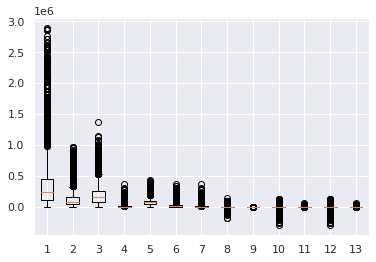

In [13]:
plt.boxplot([data["Saldo"], data["Saldo Promedio"], data["Deuda Sistea,"], data["Pasivo"], data["Venta "], 
             data["Venta Formal"], data["Pasivo_desembolso"], data["Deuda rezagada va"], data["Deuda rezagada vr"],
             data["pasivo rezagada va"], data["pasivo rezagada vr"], data["Pasivo_desembolso da"], data["Pasivo_desembolso dr"]])
plt.plot()

**Se puede observar que aun persiste un número considerable de outliers, sin embargo dado el tipo de datos (información financiera de empresas durante época de pandemía) podría perjudicar el valor de estos datos.**

**Ya que estos datos extremos están influenciados por el contexto actual, eliminarlos sería contraproducente con un modelo que busca identificar el impacto de esta crísis en las empresas.**

**Por tanto se conservarán los datos presentes, y se discretizarán para suavizar esta variación.**

In [14]:
continuo = ["Saldo", "Saldo Promedio", "Deuda Sistea,", "Pasivo", "Venta ", "Venta Formal", "Pasivo_desembolso","Deuda rezagada va", 
"Deuda rezagada vr", "pasivo rezagada va", "pasivo rezagada vr", "Pasivo_desembolso da", "Pasivo_desembolso dr"]

for val in continuo:
  disc = dsc.EqualFrequencyDiscretiser(q=5, variables=[val])
  disc.fit(data)
  df_t= disc.transform(data)
  data[val] = df_t[val]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 1997
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Sector                1816 non-null   object
 1   Dep                   1816 non-null   object
 2   Impactado             1816 non-null   int64 
 3   Saldo                 1816 non-null   int64 
 4   Saldo Promedio        1816 non-null   int64 
 5   Deuda Sistea,         1816 non-null   int64 
 6   Pasivo                1816 non-null   int64 
 7   Turismo               1816 non-null   int64 
 8   Sector de Impacto     1816 non-null   int64 
 9   Venta                 1816 non-null   int64 
 10  Venta Formal          1816 non-null   int64 
 11  Pasivo_desembolso     1816 non-null   int64 
 12  Deuda rezagada va     1816 non-null   int64 
 13  Deuda rezagada vr     1816 non-null   int64 
 14  pasivo rezagada va    1816 non-null   int64 
 15  pasivo rezagada vr    1816 non-null   

### Revisión Features Categóricos:

In [15]:
categoricas = ['Sector','Dep','Turismo','Sector de Impacto']

#SECTOR:
data['Sector'] = data['Sector'].replace(to_replace= 'COMERCIO', value = 1)
data['Sector'] = data['Sector'].replace(to_replace= 'INDUSTRIA', value = 2)
data['Sector'] = data['Sector'].replace(to_replace= 'SERVICIO', value = 3)

#DEPARTAMENTOS:
costa = ['Tumbes', 'Piura', 'Lambayeque', 'La Libertad', 'Áncash', 'Lima', 'Ica', 'Arequipa', 'Moquegua', 'Tacna', 'Callao']
sierra = ['Ayacucho', 'Junín', 'Cusco', 'Apurímac', 'San Martín', 'Cajamarca', 'Huancavelica', 'Puno', 'Pasco', 'Huánuco']
selva = ['Loreto', 'Ucayali', 'Madre de Dios', 'Amazonas', 'San Martín']

data['Dep'] = data['Dep'].replace(to_replace= costa, value = 1)
data['Dep'] = data['Dep'].replace(to_replace= sierra, value = 2)
data['Dep'] = data['Dep'].replace(to_replace= selva, value = 3)

print(data.groupby('Dep')['Dep'].count())

Dep
1    1306
2     427
3      83
Name: Dep, dtype: int64


### Information Value

In [16]:
def iv(variable):
    woe_1=data.groupby([variable])['Impactado'].agg([('Target','mean'),('Total','count'),('Malos','sum')]).reset_index()
    woe_1['Buenos']=woe_1.Total-woe_1.Malos
    woe_1['OR']=woe_1.Buenos/woe_1.Malos 
    woe_1['WOE']=np.log((woe_1.Buenos/np.sum(woe_1.Buenos))/(woe_1.Malos/np.sum(woe_1.Malos))) 
    woe_1['Dif']=woe_1.Buenos/np.sum(woe_1.Buenos)-woe_1.Malos/np.sum(woe_1.Malos)
    result = pd.DataFrame(columns=['Variable','IV'])
    result.loc[len(result)]=[variable,np.sum(woe_1.WOE*woe_1.Dif)] 
    return(result)

features = continuo + categoricas

result = pd.DataFrame(columns=['Variable','IV'])
for i in features:
  A=iv(i)
  result.loc[len(result)]=[A.loc[0].values[0],A.loc[0].values[1]]
  result=result.sort_values('IV',ascending=False)

result

,Variable,IV
2,"Deuda Sistea,",0.115364
1,Saldo Promedio,0.109495
0,Saldo,0.108927
16,Sector de Impacto,0.089962
3,Pasivo,0.058007
6,Pasivo_desembolso,0.056809
12,Pasivo_desembolso dr,0.039181
10,pasivo rezagada vr,0.038879
5,Venta Formal,0.036645
14,Dep,0.034166


**El Information Value nos indica cual es la importancia que tiene cada feature para la predicción. Si el IV del feature es menor a 2% se considerá que no tiene valor predictivo, por tanto se decidio borrar las features pasivo rezagada va y Deuda rezada va**

In [17]:
data = data.drop('pasivo rezagada va', axis = 1)
data = data.drop('Deuda rezagada va', axis = 1)

## Tratamiento de Categoricas:

Para tratar las features categóricas, se van a aplicar dos tratamientos distintos, generando dos datasets finales. El primer tratamiento consistirá en el uso de Dummy Variables. El segundo será utilizando WOEs. 

In [18]:
print(data.head())
data_dummy = data
data_woe = data
data_continua = data

continuo = ["Saldo", "Saldo Promedio", "Deuda Sistea,", "Pasivo", "Venta ", "Venta Formal", "Pasivo_desembolso", "Deuda rezagada vr",
            "pasivo rezagada vr", "Pasivo_desembolso da", "Pasivo_desembolso dr"]
categoricas = ['Sector','Dep','Turismo','Sector de Impacto']

features = continuo + categoricas

   Sector  Dep  ...  Pasivo_desembolso da  Pasivo_desembolso dr
0       2    1  ...                     3                     3
1       1    1  ...                     1                     1
2       3    3  ...                     3                     3
3       2    1  ...                     0                     0
4       1    2  ...                     2                     0

[5 rows x 16 columns]


### Dummy Variables

In [19]:
for feature in features:
    cat_list = "cat"+ "_" + feature
    cat_dummies = pd.get_dummies(data_dummy[feature], prefix=feature).iloc[:,1:]
    data_dummy = data_dummy.join(cat_dummies)

data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 1997
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Sector                  1816 non-null   int64
 1   Dep                     1816 non-null   int64
 2   Impactado               1816 non-null   int64
 3   Saldo                   1816 non-null   int64
 4   Saldo Promedio          1816 non-null   int64
 5   Deuda Sistea,           1816 non-null   int64
 6   Pasivo                  1816 non-null   int64
 7   Turismo                 1816 non-null   int64
 8   Sector de Impacto       1816 non-null   int64
 9   Venta                   1816 non-null   int64
 10  Venta Formal            1816 non-null   int64
 11  Pasivo_desembolso       1816 non-null   int64
 12  Deuda rezagada vr       1816 non-null   int64
 13  pasivo rezagada vr      1816 non-null   int64
 14  Pasivo_desembolso da    1816 non-null   int64
 15  Pasivo_desembolso dr 

In [20]:
data_dummy = data_dummy.drop(features, axis = 1)

In [21]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 1997
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Impactado               1816 non-null   int64
 1   Saldo_1                 1816 non-null   uint8
 2   Saldo_2                 1816 non-null   uint8
 3   Saldo_3                 1816 non-null   uint8
 4   Saldo_4                 1816 non-null   uint8
 5   Saldo Promedio_1        1816 non-null   uint8
 6   Saldo Promedio_2        1816 non-null   uint8
 7   Saldo Promedio_3        1816 non-null   uint8
 8   Saldo Promedio_4        1816 non-null   uint8
 9   Deuda Sistea,_1         1816 non-null   uint8
 10  Deuda Sistea,_2         1816 non-null   uint8
 11  Deuda Sistea,_3         1816 non-null   uint8
 12  Deuda Sistea,_4         1816 non-null   uint8
 13  Pasivo_1                1816 non-null   uint8
 14  Pasivo_2                1816 non-null   uint8
 15  Pasivo_3             

### WOEs

In [22]:
def woe(data,variable,target):
    woe=data.groupby([variable])[target].agg([('Target','mean'),('Total','count'),('Malos','sum')]).reset_index()
    woe['Buenos']=woe.Total-woe.Malos 
    woe['WOE']=np.log((woe.Buenos/np.sum(woe.Buenos))/(woe.Malos/np.sum(woe.Malos)))
    cats = woe[variable].unique()
    wos = woe['WOE'].unique()

    for i in range(len(cats)):
      data[variable] = data[variable].replace(to_replace= cats[i], value = wos[i])
    
    return(data)

In [34]:
for feature in features:
  data_woe = woe(data_woe, feature, 'Impactado')

print(data_woe.head())
data_woe = data_woe.abs()
print(data_woe.head())

,Sector,Dep,Impactado,Saldo,Saldo Promedio,"Deuda Sistea,",Pasivo,Turismo,Sector de Impacto,Venta,Venta Formal,Pasivo_desembolso,Deuda rezagada vr,pasivo rezagada vr,Pasivo_desembolso da,Pasivo_desembolso dr
0,0.208575,0.100837,0.0,0.505857,0.505857,0.529199,0.101191,0.032375,0.184196,0.093553,0.352208,0.081389,0.117963,0.239939,0.073827,0.217669
1,0.142013,0.100837,0.0,0.202633,0.224986,0.273446,0.101191,0.032375,0.042780,0.093553,0.352208,0.081389,0.117963,0.147109,0.151660,0.145062
2,0.181622,0.650898,0.0,0.003320,0.003320,0.169208,0.101191,0.032375,0.766857,0.093553,0.352208,0.081389,0.113729,0.239939,0.073827,0.217669
3,0.208575,0.100837,0.0,0.003320,0.003320,0.273446,0.030729,0.032375,0.184196,0.093553,0.094202,0.030729,0.102661,0.074752,0.222681,0.074752
4,0.142013,0.187328,0.0,0.173266,0.184351,0.281151,0.030729,0.032375,0.042780,0.284645,0.352208,0.030729,0.102661,0.074752,0.092633,0.074752


## Modelamiento variable objetivo

En esta sección, se ha decidido crear una función la cual se encargue de calcular los distintos modelos que se van a probar. Para hacer esto se definirán 5 funciones previas, una para cada modelo. Estas funciones serán Logistic Regression, Naive Bayes, Support Vector Machine Classification, Decision Trees y Random Forrest/XGBoost. Cada una de estas funciones debe realizar la implementación, entrenamiento del modelo, y calculo de sus respectivas métricas.  

### Función Logistic Regression:

In [24]:
def logistic_regression(Xtrain, Xtest, ytrain, ytest, rfe_features, params_logistic):
  x = np.concatenate((Xtrain, Xtest))
  y = np.concatenate((ytrain, ytest))
  lr = LogisticRegression()
  rfe = RFE(lr, rfe_features, step = 1)
  rfe.fit(x, y)
  Xtrain = rfe.transform(Xtrain)
  Xtest = rfe.transform(Xtest)
  logistic_regression = LogisticRegression(random_state = 0)
  logistic_regression.fit(Xtrain, ytrain)
  gridsearch = GridSearchCV(estimator = logistic_regression,
                          param_grid = params_logistic,
                          scoring = 'accuracy',
                          cv = 10)
  gridsearch = gridsearch.fit(Xtrain, ytrain)
  print('LOGISTIC REGRESSION FEATURES SELECT:')
  print(rfe.ranking_)
  print('LOGISTIC REGRESSION PARAMETERS:')
  print(str(gridsearch.best_params_))
  print('LOGISTIC REGRESSION METRICS:')
  print(' Accuracy: '+ str(gridsearch.best_estimator_.score(Xtest, ytest)))
  print(' Gini_train: ' + str(2*roc_auc_score(ytrain,gridsearch.best_estimator_.predict_proba(Xtrain)[:,1])-1)) 
  print(' Gini_test: ' + str(2*roc_auc_score(ytest,gridsearch.best_estimator_.predict_proba(Xtest)[:,1])-1))

### Función Naive Bayes:

In [25]:
def naive_bayes(Xtrain, Xtest, ytrain, ytest):
  #GAUSSIAN:
  nai_1 = GaussianNB()
  nai_1.fit(Xtrain,ytrain)
  nai_1_score = nai_1.score(Xtest, ytest)
  #BERNOULLI:
  nai_2 = BernoulliNB()
  nai_2.fit(Xtrain,ytrain)
  nai_2_score = nai_2.score(Xtest, ytest)
  #MULTINOMIAL:
  nai_3 = MultinomialNB()
  nai_3.fit(Xtrain,ytrain)
  nai_3_score = nai_3.score(Xtest, ytest)

  score = nai_1_score
  model = nai_1
  name_model = 'Gaussian'
  if (nai_2_score > score):
    score = nai_2_score
    name_model = 'Bernoulli'
    model = nai_2

  if (nai_3_score > score):
    score = nai_3_score
    name_model = 'Multinomial'
    model = nai_3
      
  print('NAIVE BAYES MODEL:')
  print(name_model)
  print('NAIVE BAYES METRICS:')
  print(' Accuracy: '+ str(model.score(Xtest, ytest)))
  print(' Gini_train: ' + str(2*roc_auc_score(ytrain,model.predict_proba(Xtrain)[:,1])-1)) 
  print(' Gini_test: ' + str(2*roc_auc_score(ytest,model.predict_proba(Xtest)[:,1])-1))

### Función Support Vector Machine:

In [26]:
def support_vector_classifier(Xtrain, Xtest, ytrain, ytest, params_svc):
  support_vector_classifier = SVC(random_state = 0)
  support_vector_classifier.fit(Xtrain, ytrain)
  gridsearch = GridSearchCV(estimator = support_vector_classifier,
                          param_grid = params_svc,
                          scoring = 'accuracy',
                          cv = 10)
  gridsearch = gridsearch.fit(Xtrain, ytrain)

  print('SUPPORT VECTOR MACHINE CLASSIFIER PARAMETERS:')
  print(str(gridsearch.best_params_))
  print('SUPPORT VECTOR MACHINE CLASSIFIER METRICS:')
  print(' Accuracy: '+ str(gridsearch.best_estimator_.score(Xtest, ytest)))

### Función Decision Trees:

In [27]:
def decision_tree(Xtrain, Xtest, ytrain, ytest, params_decision_tree):
  decision_tree = DecisionTreeClassifier(random_state = 0)
  decision_tree.fit(Xtrain, ytrain)
  gridsearch = GridSearchCV(estimator = decision_tree,
                          param_grid = params_decision_tree,
                          scoring = 'accuracy',
                          cv = 10)
  gridsearch = gridsearch.fit(Xtrain, ytrain)

  print('DECISION TREE CLASSIFIER PARAMETERS:')
  print(str(gridsearch.best_params_))
  print('DECISION TREE CLASSIFIER METRICS:')
  print(' Accuracy: '+ str(gridsearch.best_estimator_.score(Xtest, ytest)))
  print(' Gini_train: ' + str(2*roc_auc_score(ytrain,gridsearch.best_estimator_.predict_proba(Xtrain)[:,1])-1)) 
  print(' Gini_test: ' + str(2*roc_auc_score(ytest,gridsearch.best_estimator_.predict_proba(Xtest)[:,1])-1))

### Función RandomForrest:

In [28]:
def random_forrest_model(Xtrain, Xtest, ytrain, ytest, params_rf):
  random_forrest_model = RandomForestClassifier(random_state = 0)
  random_forrest_model.fit(Xtrain, ytrain)
  gridsearch = GridSearchCV(estimator = random_forrest_model,
                          param_grid = params_rf,
                          scoring = 'accuracy',
                          cv = 10)
  gridsearch = gridsearch.fit(Xtrain, ytrain)

  print('RANDOM FORREST CLASSIFIER PARAMETERS:')
  print(str(gridsearch.best_params_))
  print('RANDOM FORREST CLASSIFIER METRICS:')
  print(' Accuracy: '+ str(gridsearch.best_estimator_.score(Xtest, ytest)))
  print(' Gini_train: ' + str(2*roc_auc_score(ytrain,gridsearch.best_estimator_.predict_proba(Xtrain)[:,1])-1)) 
  print(' Gini_test: ' + str(2*roc_auc_score(ytest,gridsearch.best_estimator_.predict_proba(Xtest)[:,1])-1))

### Función XGBoost:

In [29]:
def xgboost_model(Xtrain, Xtest, ytrain, ytest, params_xgboost):
  xgboost = xgb.XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic', silent=True, nthread=1)
  
  xgboost.fit(Xtrain, ytrain)
  gridsearch = GridSearchCV(estimator = xgboost,
                          param_grid = params_xgboost,
                          scoring = 'accuracy',
                          cv = 10)
  gridsearch = gridsearch.fit(Xtrain, ytrain)

  print('XGBOOST CLASSIFIER PARAMETERS:')
  print(str(gridsearch.best_params_))
  print('XGBOOST CLASSIFIER METRICS:')
  print(' Accuracy: '+ str(gridsearch.best_estimator_.score(Xtest, ytest)))
  print(' Gini_train: ' + str(2*roc_auc_score(ytrain,gridsearch.best_estimator_.predict_proba(Xtrain)[:,1])-1)) 
  print(' Gini_test: ' + str(2*roc_auc_score(ytest,gridsearch.best_estimator_.predict_proba(Xtest)[:,1])-1))

### Función Modelos:

In [30]:
def classifier_models(data, y_feature, test_size, rfe_features, params_logistic, params_svc, params_decision_tree, params_rf, params_xgboost):
  X=data.drop([y_feature], axis=1)
  y=data[y_feature]
  Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size = test_size,random_state=0)
  
  #Logistic Regression:
  logistic_regression(Xtrain, Xtest, ytrain, ytest, rfe_features, params_logistic)

  #Naive Bayes:
  naive_bayes(Xtrain, Xtest, ytrain, ytest)

  #Support Vector Classifier:
  support_vector_classifier(Xtrain, Xtest, ytrain, ytest, params_svc)

  #Decision Tree:
  decision_tree(Xtrain, Xtest, ytrain, ytest, params_decision_tree)
  
  #Random Forrest:
  random_forrest_model(Xtrain, Xtest, ytrain, ytest, params_rf)

  #XGBoost Model:
  xgboost_model(Xtrain, Xtest, ytrain, ytest, params_xgboost)

### Parametros GridSearch

In [31]:
#Parameters:

params_logistic = [{"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'max_iter':[50, 100, 200, 400]}]                    
params_svc = [{'C':[1, 5, 10, 20, 50], 'kernel':['linear']},
              {'C':[1, 5, 10, 20, 50], 'kernel':['rbf', 'sigmoid','poly'], 'gamma':[0.9, 0.5, 0.1, 0.05, 0.001, 0.0005]}] 
params_decision_tree = [{'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[None, 5, 10, 20]}]
params_rf = [{'min_samples_split':[2, 5, 10, 15, 100], 'n_estimators':[100, 300, 500], 'max_depth':[5, 8, 15, 25], 'min_samples_leaf':[1, 2, 5]}]
params_xgboost = [{'num_boost_round': [100, 250, 500], 'eta': [0.05, 0.1, 0.3],'gamma': [0.5, 1, 1.5, 2], 'subsample': [0.9, 1.0],
        'colsample_bytree': [0.9, 1.0], 'max_depth': [6, 9, 12]}]  

### Implementación Modelos_Dummmy Set:

In [32]:
y_feature = 'Impactado'
test_size = 0.25
rfe_features = 28 #Al haber casi 70 features, el espacio de features debe ser mayor
data_final = data_dummy

classifier_models(data_final, y_feature, test_size, rfe_features, params_logistic, params_svc, params_decision_tree, 
                  params_rf, params_xgboost)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

LOGISTIC REGRESSION FEATURES SELECT:
[ 1 16  7  1 14  1  1 15 10  1  1  1  4  1  1  8 19  9  1  6  1  1  5 13
  1 17  1 18  1  2  1  1 11 12  1  3  1  1  1  1  1  1  1  1  1  1]
LOGISTIC REGRESSION PARAMETERS:
{'C': 0.1, 'max_iter': 50, 'penalty': 'l2'}
LOGISTIC REGRESSION METRICS:
 Accuracy: 0.5991189427312775
 Gini_train: 0.3781680953151112
 Gini_test: 0.31933442062752415
NAIVE BAYES MODEL:
Bernoulli
NAIVE BAYES METRICS:
 Accuracy: 0.6013215859030837
 Gini_train: 0.25758154078386974
 Gini_test: 0.266542404473439
SUPPORT VECTOR MACHINE CLASSIFIER PARAMETERS:
{'C': 20, 'kernel': 'linear'}
SUPPORT VECTOR MACHINE CLASSIFIER METRICS:
 Accuracy: 0.5991189427312775
DECISION TREE CLASSIFIER PARAMETERS:
{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
DECISION TREE CLASSIFIER METRICS:
 Accuracy: 0.5352422907488987
 Gini_train: 0.786608442503639
 Gini_test: 0.058364398881640245
RANDOM FORREST CLASSIFIER PARAMETERS:
{'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 100,

### Implementación Modelos_WOEs Set:

In [35]:
y_feature = 'Impactado'
test_size = 0.25
rfe_features = 10 #Al haber casi 70 features, el espacio de features debe ser mayor
data_final = data_woe

classifier_models(data_final, y_feature, test_size, rfe_features, params_logistic, params_svc, params_decision_tree, 
                  params_rf, params_xgboost)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

LOGISTIC REGRESSION FEATURES SELECT:
[1 1 4 6 1 3 1 1 5 1 1 1 1 2 1]
LOGISTIC REGRESSION PARAMETERS:
{'C': 1000.0, 'max_iter': 50, 'penalty': 'l2'}
LOGISTIC REGRESSION METRICS:
 Accuracy: 0.6145374449339207
 Gini_train: 0.254308048951426
 Gini_test: 0.27372631251941604
NAIVE BAYES MODEL:
Gaussian
NAIVE BAYES METRICS:
 Accuracy: 0.6145374449339207
 Gini_train: 0.2501115963124698
 Gini_test: 0.3248679714196956
SUPPORT VECTOR MACHINE CLASSIFIER PARAMETERS:
{'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}
SUPPORT VECTOR MACHINE CLASSIFIER METRICS:
 Accuracy: 0.6255506607929515
DECISION TREE CLASSIFIER PARAMETERS:
{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
DECISION TREE CLASSIFIER METRICS:
 Accuracy: 0.6145374449339207
 Gini_train: 0.3706442395816485
 Gini_test: 0.2385639950295122
RANDOM FORREST CLASSIFIER PARAMETERS:
{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 100}
RANDOM FORREST CLASSIFIER METRICS:
 Accuracy: 0.5925110132158591
 Gini_train: 